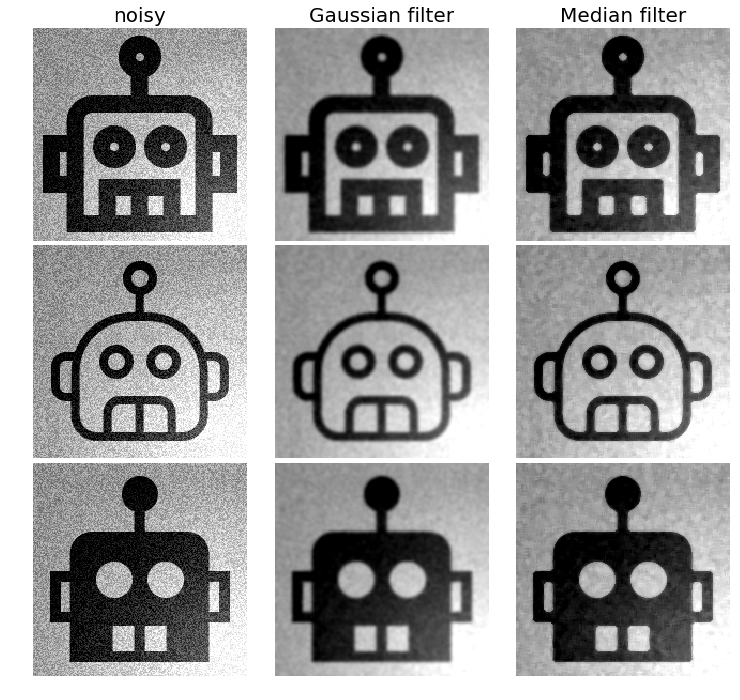

In [58]:
#TASK1
#Medial filter
import matplotlib.pyplot as plt
from scipy import ndimage as pltimg
from scipy.ndimage.filters import median_filter
from matplotlib.pylab import imread, imshow, subplot, title, show, get_cmap
from skimage import feature
im1 = pltimg.imread('.\\Data2\\Head\\0.png')
im2 = pltimg.imread('.\\Data2\\Head\\2.png')
im3 = pltimg.imread('.\\Data2\\Head\\5.png')
im4 = pltimg.imread('.\\Data2\\Head\\6.png')
im5 = pltimg.imread('.\\Data2\\Head\\8.png')
fig = plt.figure(figsize=(10,10))


gauss_denoised1 = pltimg.gaussian_filter(im1, 1.5)
med_denoised1 = pltimg.median_filter(im1, 5)
plt.subplot(331)
plt.imshow(im1, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(332)
plt.imshow(gauss_denoised1, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(333)
plt.imshow(med_denoised1, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)



gauss_denoised2 = pltimg.gaussian_filter(im2, 1.5)
med_denoised2 = pltimg.median_filter(im2, 5)
plt.subplot(334)
plt.imshow(im2, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.subplot(335)
plt.imshow(gauss_denoised2, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.subplot(336)
plt.imshow(med_denoised2, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)


gauss_denoised3 = pltimg.gaussian_filter(im3, 1.5)
med_denoised3 = pltimg.median_filter(im3, 5)
plt.subplot(337)
plt.imshow(im3, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.subplot(338)
plt.imshow(gauss_denoised3, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.subplot(339)
plt.imshow(med_denoised3, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)

plt.show()




C:\MachineVision\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log2


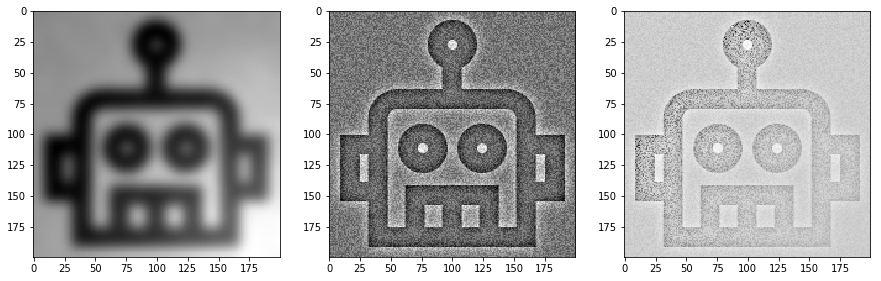

In [34]:
#TASK2
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy import ndimage as pltimg
import numpy as np

im1 = img.imread('.\\Data2\\Head\\0.png')
im2 = img.imread('.\\Data2\\Head\\2.png')
im3 = img.imread('.\\Data2\\Head\\5.png')
im4 = img.imread('.\\Data2\\Head\\6.png')
im5 = img.imread('.\\Data2\\Head\\8.png')
gflt = pltimg.gaussian_filter(im1, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(im1,cmap='gray')
plt.imshow((im1-gflt),cmap='gray')
maxValue = (im1-gflt).max();
minValue = (im1-gflt).min();
diff = np.log2(im1)-np.log2(gflt);
newImage = (diff-minValue)/(maxValue-minValue)
plt.subplot(133)
plt.imshow(newImage,cmap='gray')
plt.show()

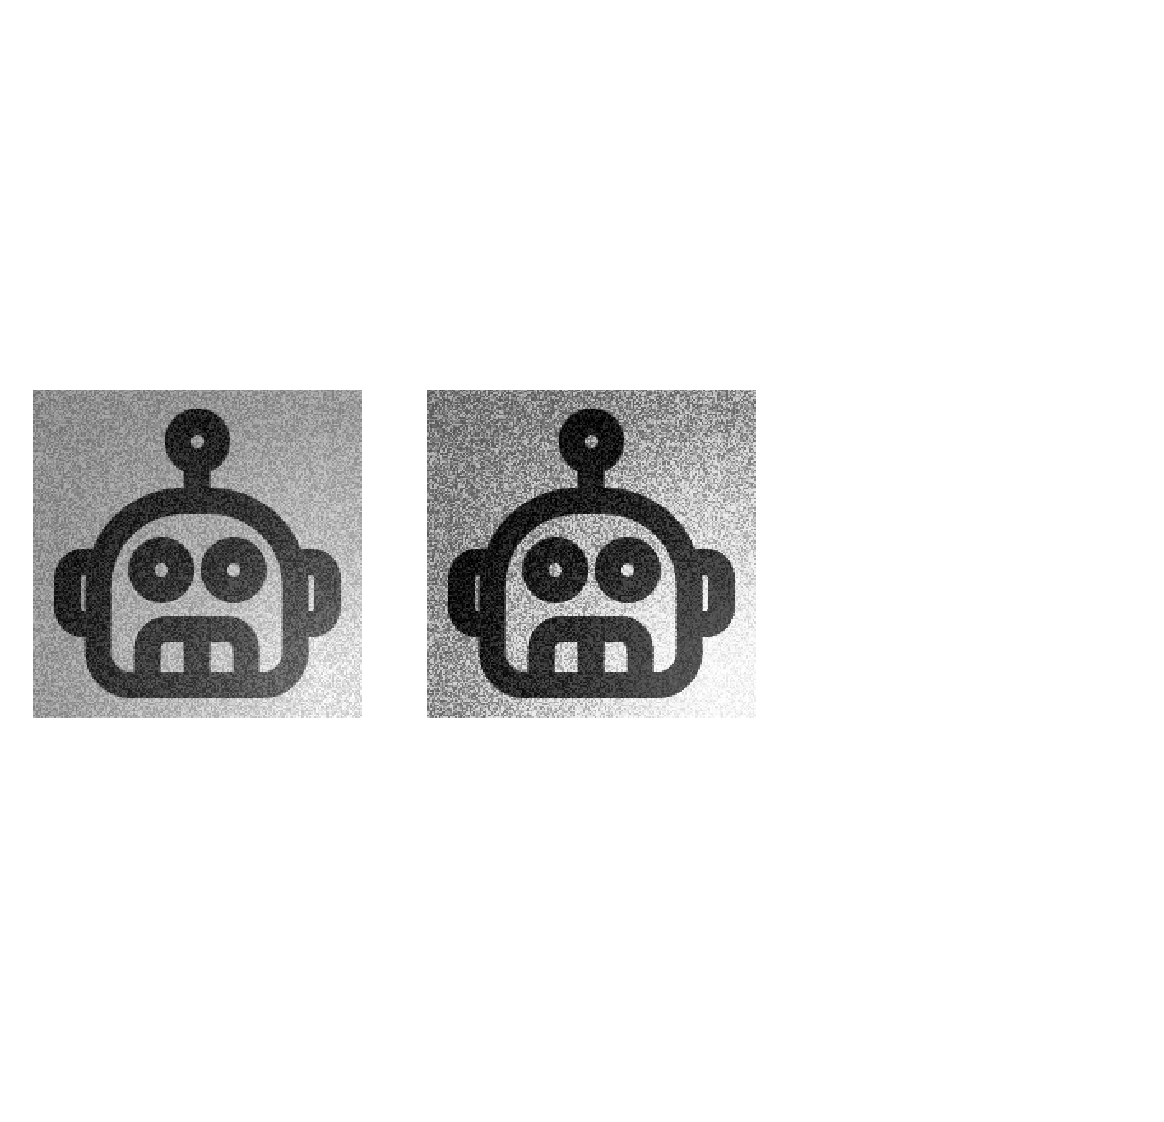

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as pltimg
im =cv2.imread('.\\Data2\\Head\\8.png',0)

equalizer = cv2.equalizeHist(im)
fig = plt.figure(figsize=(20,20))
plt.subplot(131) 
plt.axis('off')
plt.imshow(im, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.imshow(equalizer, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.show()

In [43]:
#TASK3
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy import ndimage
from PIL import Image

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [44]:
image_size = 50 # Pixel width and height.
size = image_size,image_size
pixel_depth = 255.0 # Number of levels per pixel.
sizes = [784,622,222,473]
folders = [
    r'.\\data2\\Arms\\',
    r'.\\data2\\Figure_normal_legs\\',
    r'.\\data2\\FigureWheels\\',
    r'.\\data2\\Head\\'
]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      img = Image.open(image_file)
      newImg = img.resize(size, Image.ANTIALIAS)
      image_data = (np.array(newImg).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, 7))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)

.\\data2\\Arms\\
Full dataset tensor: (784, 50, 50)
Mean: 0.112748
Standard deviation: 0.15943
.\\data2\\Figure_normal_legs\\
Full dataset tensor: (622, 50, 50)
Mean: 0.0886578
Standard deviation: 0.17902
.\\data2\\FigureWheels\\
Full dataset tensor: (222, 50, 50)
Mean: 0.0753042
Standard deviation: 0.184759
.\\data2\\Head\\
Full dataset tensor: (473, 50, 50)
Mean: 0.0373346
Standard deviation: 0.210811


Total samples number: (2101, 50, 50)
Samples for tests: 526
Samples for trains: 1575


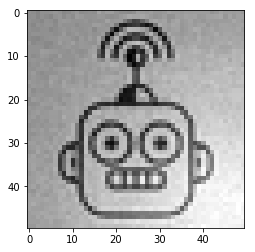

In [45]:
from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])
plt.imshow(X_tests[0],cmap='gray')

In [56]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/4), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/8), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('sigmoid', name="sigmoid"))
model.summary()

# Compile model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=10, 
          batch_size=10, 
          verbose=2, 
       )
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

(50, 50)
4


C:\MachineVision\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, input_shape=(2500,), activation="relu", kernel_initializer="uniform")`
C:\MachineVision\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, activation="relu", kernel_initializer="uniform")`
C:\MachineVision\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1250, activation="relu", kernel_initializer="uniform")`
C:\MachineVision\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(625, activation="relu", kernel_initializer="uniform")`
C:\MachineVision\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(312, activation="relu", kernel_initializer="uniform")`
C:\MachineVision\lib\site-packages\ipykernel_launcher.py:29: UserWarnin

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 2500)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dense_14 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dense_15 (Dense)             (None, 1250)              3126250   
_________________________________________________________________
dense_16 (Dense)             (None, 625)               781875    
_________________________________________________________________
dense_17 (Dense)             (None, 312)               195312    
_________________________________________________________________
output (Dense)               (None, 4)                 1252      
__________